Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 1

C:\Users\jaya karthick\AppData\Local\Temp\ipykernel_24900\3090720183.py:26: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


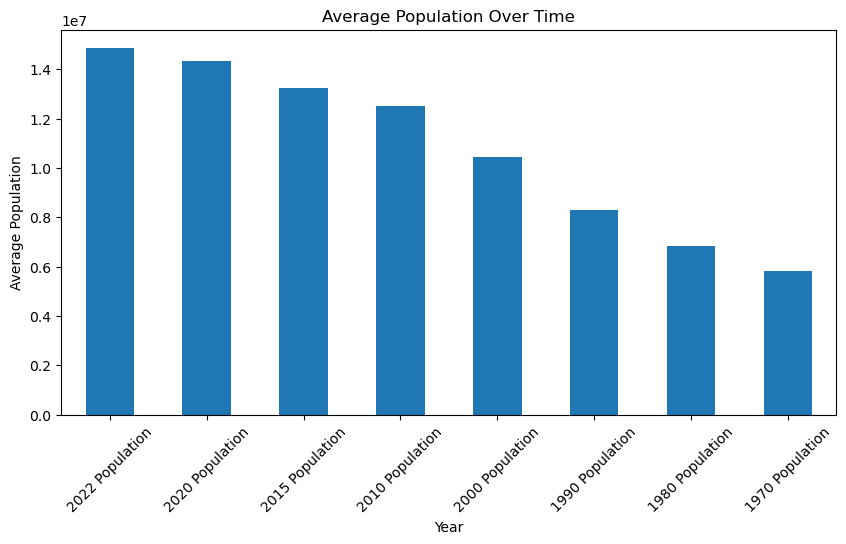

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('C:\\Users\\jaya karthick\\Downloads\\archive (7)\\World_population.csv', encoding='utf-8')  # Replace with actual dataset filename

# Display initial information
print("Initial Data Overview:")
print(df.info())
print(df.head())

# Ensure correct column names and strip spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Convert population columns to numeric and handle errors
population_columns = ['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']
existing_columns = [col for col in population_columns if col in df.columns]

for col in existing_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values (fill with mean or interpolate)
df.fillna(df.mean(numeric_only=True), inplace=True)
# Alternatively, interpolate missing values
df.interpolate(method='linear', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handling outliers using IQR method for each population column
for col in existing_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Display cleaned dataset summary
print("Cleaned Data Overview:")
print(df.info())
print(df.head())

# Save cleaned data
df.to_csv('cleaned_population_data.csv', index=False)

# Logging number of affected values
print(f"Missing values after cleaning: {df.isna().sum().sum()}")

# Basic Visualization
if len(existing_columns) > 1:
    df[existing_columns].mean().plot(kind='bar', figsize=(10, 5), title='Average Population Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Population')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
'C:\\Users\\jaya karthick\\Downloads\\archive (7)\\World_population.csv'